# Data Loading and Necessary Imports

In [ ]:
# Installing pyspark library
!pip install pyspark py4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=f666905be7989c743e4a44ceae853ec7079c3469171641d4991bd23118559fb1
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
# Importing library from pyspark model
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("MyApp").getOrCreate()


In [ ]:
# Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset and storing it in a variable
collision_data= spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/content/drive/MyDrive/colz/Motor_Vehicle_Collisions_-_Crashes.csv")

In [ ]:
collision_data.show()

+----------+----------+---------+--------+---------+----------+--------------------+--------------------+--------------------+--------------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+------------+--------------------+--------------------+-------------------+-------------------+-------------------+
|CRASH DATE|CRASH TIME|  BOROUGH|ZIP CODE| LATITUDE| LONGITUDE|            LOCATION|      ON STREET NAME|   CROSS STREET NAME|     OFF STREET NAME|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOTORIST KILLED|CONTRIBUTING

# Descriptive Analysis

In [ ]:
# Displaying the total number of rows and columns of the dataset and printing the result
num_rows = collision_data.count()
num_columns = len(collision_data.columns)

# Print the result
print("Total number of Rows and Columns:", num_rows, "rows", num_columns, "columns")


Total number of Rows and Columns: 2016266 rows 29 columns


In [ ]:
# Displaying the name of the columns in the dataset
column_names = collision_data.columns
column_names

['CRASH DATE',
 'CRASH TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'ON STREET NAME',
 'CROSS STREET NAME',
 'OFF STREET NAME',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'COLLISION_ID',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5']

In [ ]:
# Displayinng the datatypes of the columns
data_types = collision_data.dtypes
data_types

[('CRASH DATE', 'string'),
 ('CRASH TIME', 'string'),
 ('BOROUGH', 'string'),
 ('ZIP CODE', 'string'),
 ('LATITUDE', 'double'),
 ('LONGITUDE', 'double'),
 ('LOCATION', 'string'),
 ('ON STREET NAME', 'string'),
 ('CROSS STREET NAME', 'string'),
 ('OFF STREET NAME', 'string'),
 ('NUMBER OF PERSONS INJURED', 'string'),
 ('NUMBER OF PERSONS KILLED', 'int'),
 ('NUMBER OF PEDESTRIANS INJURED', 'int'),
 ('NUMBER OF PEDESTRIANS KILLED', 'int'),
 ('NUMBER OF CYCLIST INJURED', 'int'),
 ('NUMBER OF CYCLIST KILLED', 'string'),
 ('NUMBER OF MOTORIST INJURED', 'string'),
 ('NUMBER OF MOTORIST KILLED', 'int'),
 ('CONTRIBUTING FACTOR VEHICLE 1', 'string'),
 ('CONTRIBUTING FACTOR VEHICLE 2', 'string'),
 ('CONTRIBUTING FACTOR VEHICLE 3', 'string'),
 ('CONTRIBUTING FACTOR VEHICLE 4', 'string'),
 ('CONTRIBUTING FACTOR VEHICLE 5', 'string'),
 ('COLLISION_ID', 'int'),
 ('VEHICLE TYPE CODE 1', 'string'),
 ('VEHICLE TYPE CODE 2', 'string'),
 ('VEHICLE TYPE CODE 3', 'string'),
 ('VEHICLE TYPE CODE 4', 'string'

In [ ]:
# Select columns with categorical data
categorical_columns = [column for column, data_type in collision_data.dtypes if data_type == "string"]

# Print the list of categorical columns
print("Categorical Columns:")
for column in categorical_columns:
    print(column)

Categorical Columns:
CRASH DATE
CRASH TIME
BOROUGH
ZIP CODE
LOCATION
ON STREET NAME
CROSS STREET NAME
OFF STREET NAME
NUMBER OF PERSONS INJURED
NUMBER OF CYCLIST KILLED
NUMBER OF MOTORIST INJURED
CONTRIBUTING FACTOR VEHICLE 1
CONTRIBUTING FACTOR VEHICLE 2
CONTRIBUTING FACTOR VEHICLE 3
CONTRIBUTING FACTOR VEHICLE 4
CONTRIBUTING FACTOR VEHICLE 5
VEHICLE TYPE CODE 1
VEHICLE TYPE CODE 2
VEHICLE TYPE CODE 3
VEHICLE TYPE CODE 4
VEHICLE TYPE CODE 5


In [ ]:
from pyspark.sql.functions import col
# Select columns with numeric data (integer or float)
numeric_columns = [col(column).cast("double") for column, data_type in collision_data.dtypes if data_type in ("int", "double")]

# Print the list of numeric columns
print("Numeric Columns:")
for column in numeric_columns:
    print(column)

Numeric Columns:
Column<'CAST(LATITUDE AS DOUBLE)'>
Column<'CAST(LONGITUDE AS DOUBLE)'>
Column<'CAST(NUMBER OF PERSONS KILLED AS DOUBLE)'>
Column<'CAST(NUMBER OF PEDESTRIANS INJURED AS DOUBLE)'>
Column<'CAST(NUMBER OF PEDESTRIANS KILLED AS DOUBLE)'>
Column<'CAST(NUMBER OF CYCLIST INJURED AS DOUBLE)'>
Column<'CAST(NUMBER OF MOTORIST KILLED AS DOUBLE)'>
Column<'CAST(COLLISION_ID AS DOUBLE)'>


In [ ]:
# importing libraries from pyspark
from pyspark.sql.functions import col
unique_value_counts = {}

# Iterate through columns and calculate the number of unique values
for column in collision_data.columns:
    unique_count = collision_data.select(column).distinct().count()
    unique_value_counts[column] = unique_count

# Print the number of unique values for each column
print("\nNumber of Unique Values:")
for column, count in unique_value_counts.items():
    print(f"{column}: {count}")



Number of Unique Values:
CRASH DATE: 4057
CRASH TIME: 1441
BOROUGH: 7
ZIP CODE: 236
LATITUDE: 125721
LONGITUDE: 97812
LOCATION: 273713
ON STREET NAME: 17978
CROSS STREET NAME: 20030
OFF STREET NAME: 214961
NUMBER OF PERSONS INJURED: 33
NUMBER OF PERSONS KILLED: 8
NUMBER OF PEDESTRIANS INJURED: 15
NUMBER OF PEDESTRIANS KILLED: 5
NUMBER OF CYCLIST INJURED: 7
NUMBER OF CYCLIST KILLED: 5
NUMBER OF MOTORIST INJURED: 32
NUMBER OF MOTORIST KILLED: 7
CONTRIBUTING FACTOR VEHICLE 1: 62
CONTRIBUTING FACTOR VEHICLE 2: 62
CONTRIBUTING FACTOR VEHICLE 3: 52
CONTRIBUTING FACTOR VEHICLE 4: 42
CONTRIBUTING FACTOR VEHICLE 5: 31
COLLISION_ID: 2016265
VEHICLE TYPE CODE 1: 1564
VEHICLE TYPE CODE 2: 1735
VEHICLE TYPE CODE 3: 248
VEHICLE TYPE CODE 4: 100
VEHICLE TYPE CODE 5: 68


# Statistical Analysis

In [ ]:
# Displaying the count , mean , standard deviation , minimum and maximum value of the columns within the dataset
collision_data.describe().show()

+-------+---------------+----------+-------------+------------------+------------------+------------------+----------+--------------------+--------------------+--------------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|summary|     CRASH DATE|CRASH TIME|      BOROUGH|          ZIP CODE|          LATITUDE|         LONGITUDE|  LOCATION|      ON STREET NAME|   CROSS STREET NAME|     OFF STREET NAME|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST K

In [ ]:
# Creating a list of numeric columns by iterating through the dataset's column data types
numeric_columns = [column for column, data_type in collision_data.dtypes if data_type in ('double', 'int')]

# Creating a dictionary to store the calculated IQR (Interquartile Range) values for each numeric column
iqr_values = {}

# Calculating the IQR for each numeric column
for column in numeric_columns:
    # Useing the approxQuantile method to estimate the 25th (Q1) and 75th (Q3) percentiles, with a tolerance of 0.05
    quantiles = collision_data.approxQuantile(column, [0.25, 0.75], 0.05)

    # Extracting the 25th and 75th percentile values
    Q1 = quantiles[0]
    Q3 = quantiles[1]

    # Calculating the IQR by subtracting Q1 from Q3
    IQR = Q3 - Q1

    # Defining the lower and upper bounds for identifying outliers using the IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Storing the lower and upper bounds in the iqr_values dictionary for this column
    iqr_values[column] = (lower_bound, upper_bound)

# Printing the calculated IQR values for each numeric column
for column, iqr in iqr_values.items():
    print(f"IQR for '{column}': {iqr}")

IQR for 'LATITUDE': (40.51730499999999, 40.916065)
IQR for 'LONGITUDE': (-74.12790675000001, -73.72415994999999)
IQR for 'NUMBER OF PERSONS KILLED': (0.0, 0.0)
IQR for 'NUMBER OF PEDESTRIANS INJURED': (0.0, 0.0)
IQR for 'NUMBER OF PEDESTRIANS KILLED': (0.0, 0.0)
IQR for 'NUMBER OF CYCLIST INJURED': (0.0, 0.0)
IQR for 'NUMBER OF MOTORIST KILLED': (0.0, 0.0)
IQR for 'COLLISION_ID': (1095973.0, 6000053.0)


# Data Cleaning

In [ ]:

# Importing necessary libraries
from pyspark.sql.functions import col, sum as spark_sum

# Creating a dictionary to store missing value counts for each column
missing_counts = {}

# Calculating missing value counts for each column
for col_name in collision_data.columns:
    # Using the `where` function to filter rows where the column is either null or an empty string ("")
    missing_count = collision_data.where(col(col_name).isNull() | (col(col_name) == "")).count()

    # Storing the missing value count in the missing_counts dictionary
    missing_counts[col_name] = missing_count

# Printing missing value counts for each column
for col_name, missing_count in missing_counts.items():
    # Formating and print the column name and its corresponding missing value count
    print(f"{col_name: <45} {missing_count: >10}")



CRASH DATE                                             0
CRASH TIME                                             0
BOROUGH                                           627230
ZIP CODE                                          627468
LATITUDE                                          229550
LONGITUDE                                         229550
LOCATION                                          229550
ON STREET NAME                                    424219
CROSS STREET NAME                                 754476
OFF STREET NAME                                  1684418
NUMBER OF PERSONS INJURED                             19
NUMBER OF PERSONS KILLED                              33
NUMBER OF PEDESTRIANS INJURED                          2
NUMBER OF PEDESTRIANS KILLED                           2
NUMBER OF CYCLIST INJURED                              1
NUMBER OF CYCLIST KILLED                               1
NUMBER OF MOTORIST INJURED                             1
NUMBER OF MOTORIST KILLED      

In [ ]:
# Importing necessary libraries for working with data types and Spark functions
from pyspark.sql.types import IntegerType, StringType, TimestampType

# Converting columns to the desired data types

# Converting timestamp columns to TimestampType
collision_data = collision_data \
    .withColumn("CRASH DATE", col("CRASH DATE").cast(TimestampType())) \
    .withColumn("CRASH TIME", col("CRASH TIME").cast(TimestampType()))

# Converting string columns to StringType
collision_data = collision_data \
    .withColumn("BOROUGH", col("BOROUGH").cast(StringType())) \
    .withColumn("ON STREET NAME", col("ON STREET NAME").cast(StringType())) \
    .withColumn("CROSS STREET NAME", col("CROSS STREET NAME").cast(StringType())) \
    .withColumn("OFF STREET NAME", col("OFF STREET NAME").cast(StringType())) \
    .withColumn("CONTRIBUTING FACTOR VEHICLE 1", col("CONTRIBUTING FACTOR VEHICLE 1").cast(StringType())) \
    .withColumn("CONTRIBUTING FACTOR VEHICLE 2", col("CONTRIBUTING FACTOR VEHICLE 2").cast(StringType())) \
    .withColumn("CONTRIBUTING FACTOR VEHICLE 3", col("CONTRIBUTING FACTOR VEHICLE 3").cast(StringType())) \
    .withColumn("CONTRIBUTING FACTOR VEHICLE 4", col("CONTRIBUTING FACTOR VEHICLE 4").cast(StringType())) \
    .withColumn("CONTRIBUTING FACTOR VEHICLE 5", col("CONTRIBUTING FACTOR VEHICLE 5").cast(StringType())) \
    .withColumn("VEHICLE TYPE CODE 1", col("VEHICLE TYPE CODE 1").cast(StringType())) \
    .withColumn("VEHICLE TYPE CODE 2", col("VEHICLE TYPE CODE 2").cast(StringType())) \
    .withColumn("VEHICLE TYPE CODE 3", col("VEHICLE TYPE CODE 3").cast(StringType())) \
    .withColumn("VEHICLE TYPE CODE 4", col("VEHICLE TYPE CODE 4").cast(StringType())) \
    .withColumn("VEHICLE TYPE CODE 5", col("VEHICLE TYPE CODE 5").cast(StringType()))

# Filling null values with 0 and convert to IntegerType for specific columns
collision_data = collision_data \
    .withColumn("NUMBER OF PERSONS KILLED", col("NUMBER OF PERSONS KILLED").cast(IntegerType())) \
    .withColumn("NUMBER OF PERSONS INJURED", col("NUMBER OF PERSONS INJURED").cast(IntegerType())) \
    .fillna(0, subset=["NUMBER OF PERSONS KILLED", "NUMBER OF PERSONS INJURED"])

# Displaying the updated DataFrame
collision_data.show()

# Printing a message indicating that datatype conversion is completed
print("Datatype conversion completed!")



+----------+-------------------+---------+--------+---------+----------+--------------------+--------------------+--------------------+--------------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+------------+--------------------+--------------------+-------------------+-------------------+-------------------+
|CRASH DATE|         CRASH TIME|  BOROUGH|ZIP CODE| LATITUDE| LONGITUDE|            LOCATION|      ON STREET NAME|   CROSS STREET NAME|     OFF STREET NAME|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOTORIST K

In [ ]:
# Importing the necessary Spark functions
from pyspark.sql.functions import when

# Defining lists of numeric and string columns
numeric_columns = ["NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]
string_columns = ["BOROUGH", "ON STREET NAME", "CROSS STREET NAME", "OFF STREET NAME", "CONTRIBUTING FACTOR VEHICLE 1", "CONTRIBUTING FACTOR VEHICLE 2", "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4", "CONTRIBUTING FACTOR VEHICLE 5", "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"]

# Replacing missing values in numeric columns with 0
for column in numeric_columns:
    # Using the `when` function to check if the column is null, and if so, replace it with 0; otherwise, keep the original value
    collision_data = collision_data.withColumn(column, when(col(column).isNull(), 0).otherwise(col(column)))

# Replacing missing values in string columns with an empty string
for column in string_columns:
    # Using the `when` function to check if the column is null, and if so, replace it with an empty string; otherwise, keep the original value
    collision_data = collision_data.withColumn(column, when(col(column).isNull(), "").otherwise(col(column)))



In [ ]:
# Replace null values or blanks in the "BOROUGH" column with 'No Value'
collision_data = collision_data.withColumn("BOROUGH", when(col("BOROUGH").isNull() | (col("BOROUGH") == ""), "No Value").otherwise(col("BOROUGH")))

# Filter out rows where "BOROUGH" is 'nan'
collision_data = collision_data.filter(col("BOROUGH") != "nan")

print("Replace Successful")


Replace Successful


In [ ]:
# Replace null values or blanks in the "CONTRIBUTING FACTOR VEHICLE 1" column with 'No Value'
collision_data = collision_data.withColumn("CONTRIBUTING FACTOR VEHICLE 1", when(col("CONTRIBUTING FACTOR VEHICLE 1").isNull() | (col("CONTRIBUTING FACTOR VEHICLE 1") == ""), "No Value").otherwise(col("CONTRIBUTING FACTOR VEHICLE 1")))

print("Replace Successful")


Replace Successful


In [ ]:
# Replace null values or blanks in the "VEHICLE TYPE CODE 1" column with 'No Value'
collision_data = collision_data.withColumn("VEHICLE TYPE CODE 1", when(col("VEHICLE TYPE CODE 1").isNull() | (col("VEHICLE TYPE CODE 1") == ""), "No Value").otherwise(col("VEHICLE TYPE CODE 1")))

print("Replace Successful")


Replace Successful


In [ ]:
# List of columns to drop
columns_to_drop = ['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 2',
                   'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 2',
                   'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

# Drop the specified columns
collision_data = collision_data.drop(*columns_to_drop)
collision_data.show()
print("Variables dropped!")


+----------+-------------------+---------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+------------+--------------------+
|CRASH DATE|         CRASH TIME|  BOROUGH|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOTORIST KILLED|CONTRIBUTING FACTOR VEHICLE 1|COLLISION_ID| VEHICLE TYPE CODE 1|
+----------+-------------------+---------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+------------+--------------------+
|      null|2023-09-18 02:39:00| No V

In [ ]:
# Count the occurrences of duplicate rows
duplicate_count = collision_data.groupBy(collision_data.columns).count().filter(col("count") > 1).count()

print(f"Total occurrences of duplicate rows: {duplicate_count}")


Total occurrences of duplicate rows: 0


In [ ]:
# Drop the "CRASH DATE" column
collision_data = collision_data.drop("CRASH DATE")

print("CRASH DATE column dropped!")

CRASH DATE column dropped!


In [ ]:
# Get the number of rows and columns
num_rows = collision_data.count()
num_columns = len(collision_data.columns)

# Get the column names
column_names = collision_data.columns

print(f"Total number of Rows: {num_rows}")
print(f"Total number of Columns: {num_columns}")
print(f"Column Names: {column_names}")


Total number of Rows: 2016266
Total number of Columns: 13
Column Names: ['CRASH TIME', 'BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'COLLISION_ID', 'VEHICLE TYPE CODE 1']


In [ ]:
# Iterate through the columns and count the null values
for column in collision_data.columns:
    null_count = collision_data.filter(col(column).isNull()).count()
    print(f"{column: <45} {null_count: >10}")


CRASH TIME                                             1
BOROUGH                                                0
NUMBER OF PERSONS INJURED                              0
NUMBER OF PERSONS KILLED                               0
NUMBER OF PEDESTRIANS INJURED                          2
NUMBER OF PEDESTRIANS KILLED                           2
NUMBER OF CYCLIST INJURED                              1
NUMBER OF CYCLIST KILLED                               1
NUMBER OF MOTORIST INJURED                             1
NUMBER OF MOTORIST KILLED                              2
CONTRIBUTING FACTOR VEHICLE 1                          0
COLLISION_ID                                           2
VEHICLE TYPE CODE 1                                    0


In [ ]:
# List of columns with null values
columns_with_null = ["NUMBER OF PEDESTRIANS INJURED", "NUMBER OF PEDESTRIANS KILLED", "NUMBER OF CYCLIST INJURED", "NUMBER OF CYCLIST KILLED", "NUMBER OF MOTORIST INJURED", "NUMBER OF MOTORIST KILLED"]

# Impute null values with 0 for numeric columns
for column in columns_with_null:
    collision_data = collision_data.withColumn(column, when(col(column).isNull(), 0).otherwise(col(column)))


In [ ]:
# Drop rows with null "CRASH TIME"
collision_data = collision_data.dropna(subset=["CRASH TIME"])

In [ ]:
# Drop rows with null "COLLISION_ID"
collision_data = collision_data.dropna(subset=["COLLISION_ID"])

In [ ]:
value_to_drop = 'No Value'
column_to_check = 'BOROUGH'

# Drop rows with the specified value in the specified column
collision = collision_data.filter(collision_data[column_to_check] != value_to_drop)

# Show the DataFrame after dropping rows
collision.show()

+-------------------+-------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+------------+--------------------+----+-----+----+-----------+
|         CRASH TIME|      BOROUGH|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOTORIST KILLED|CONTRIBUTING FACTOR VEHICLE 1|COLLISION_ID| VEHICLE TYPE CODE 1|Year|Month|Hour|Day of Week|
+-------------------+-------------+-------------------------+------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+------------+--------------------+---

In [ ]:
for column in collision_data.columns:
    null_count = collision_data.filter(col(column).isNull()).count()
    print(f"{column: <45} {null_count: >10}")

CRASH TIME                                             0
BOROUGH                                                0
NUMBER OF PERSONS INJURED                              0
NUMBER OF PERSONS KILLED                               0
NUMBER OF PEDESTRIANS INJURED                          0
NUMBER OF PEDESTRIANS KILLED                           0
NUMBER OF CYCLIST INJURED                              0
NUMBER OF CYCLIST KILLED                               0
NUMBER OF MOTORIST INJURED                             0
NUMBER OF MOTORIST KILLED                              0
CONTRIBUTING FACTOR VEHICLE 1                          0
COLLISION_ID                                           0
VEHICLE TYPE CODE 1                                    0


# Data Visualization

In [ ]:
#  Select the 'Weapon Desc' column and find unique values
unique_factor = collision_data.select("CONTRIBUTING FACTOR VEHICLE 1").distinct()

# Show all unique values without limiting the number of rows
unique_factor.show(unique_factor.count(), truncate=False)


+-----------------------------------------------------+
|CONTRIBUTING FACTOR VEHICLE 1                        |
+-----------------------------------------------------+
|Following Too Closely                                |
|Traffic Control Disregarded                          |
|Driverless/Runaway Vehicle                           |
|Accelerator Defective                                |
|Windshield Inadequate                                |
|Using On Board Navigation Device                     |
|Unsafe Speed                                         |
|Shoulders Defective/Improper                         |
|Tinted Windows                                       |
|Oversized Vehicle                                    |
|Passing or Lane Usage Improper                       |
|Lane Marking Improper/Inadequate                     |
|Other Lighting Defects                               |
|Aggressive Driving/Road Rage                         |
|Other Vehicular                                

In [ ]:
%matplotlib inline

In [ ]:
from pyspark.sql.functions import month, year
import matplotlib.pyplot as plt

# Extract year and month from "CRASH TIME"
collision_data = collision_data.withColumn("Year", year("CRASH TIME"))
collision_data = collision_data.withColumn("Month", month("CRASH TIME"))

# Calculate crash frequency by year and month
crash_frequency = collision_data.groupBy("Year", "Month").count().orderBy("Year", "Month")

# Convert PySpark DataFrame to Pandas for plotting (optional)
crash_frequency_pd = crash_frequency.toPandas()

# Plot crash frequency by month using the display() function for interactive plots
display(crash_frequency_pd)

,Year,Month,count
0,2023,9,2016264


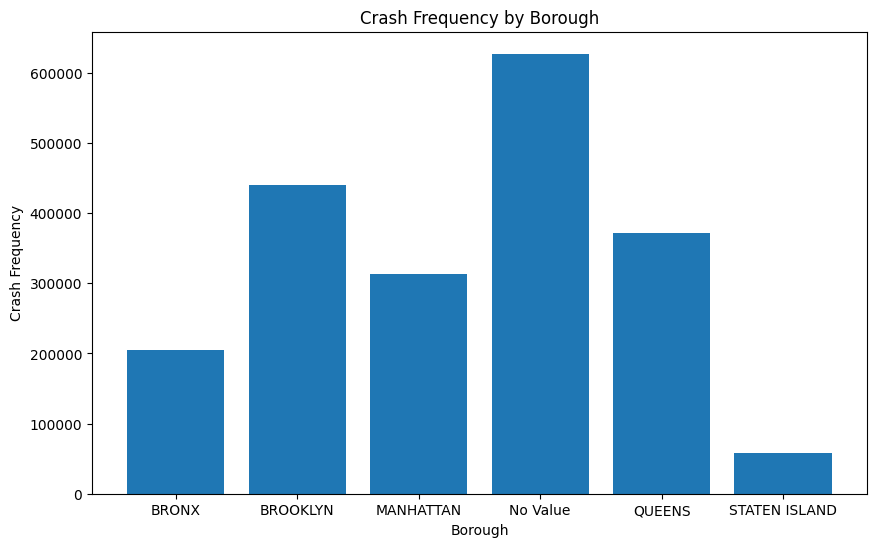

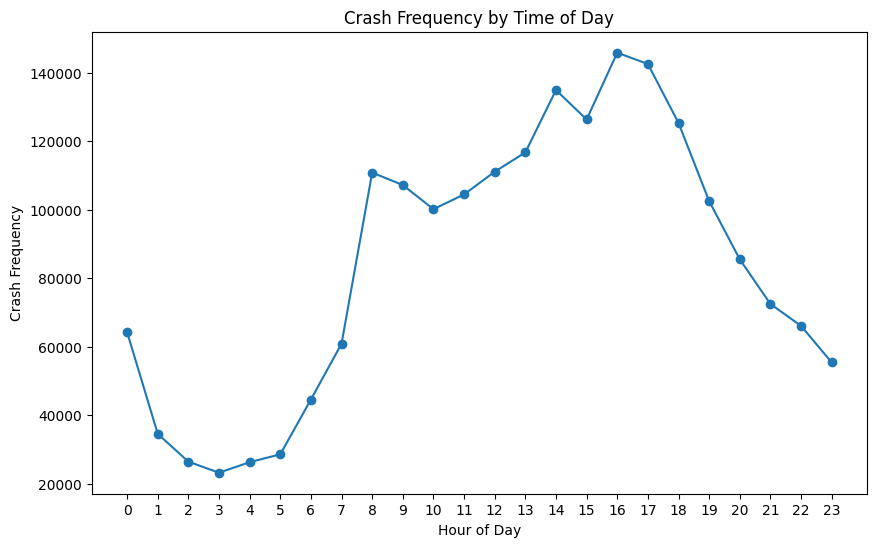

In [ ]:
from pyspark.sql.functions import hour, dayofweek
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Calculate crash frequency by borough
crash_frequency_borough = collision_data.groupBy("BOROUGH").count().orderBy("BOROUGH")

# Convert "CRASH TIME" to datetime format (assuming it's not already in datetime)
collision_data = collision_data.withColumn("CRASH TIME", F.to_timestamp("CRASH TIME"))

# Calculate crash frequency by hour of the day
collision_data = collision_data.withColumn("Hour", hour("CRASH TIME"))
crash_frequency_time_of_day = collision_data.groupBy("Hour").count().orderBy("Hour")

# Calculate crash frequency by day of the week
collision_data = collision_data.withColumn("Day of Week", dayofweek("CRASH TIME"))
crash_frequency_day_of_week = collision_data.groupBy("Day of Week").count().orderBy("Day of Week")

# Convert PySpark DataFrames to Pandas for plotting (optional)
crash_frequency_borough_pd = crash_frequency_borough.toPandas()
crash_frequency_time_of_day_pd = crash_frequency_time_of_day.toPandas()
crash_frequency_day_of_week_pd = crash_frequency_day_of_week.toPandas()

# Plot crash frequency by borough
plt.figure(figsize=(10, 6))
plt.bar(crash_frequency_borough_pd["BOROUGH"], crash_frequency_borough_pd["count"])
plt.xlabel('Borough')
plt.ylabel('Crash Frequency')
plt.title('Crash Frequency by Borough')
plt.show()

# Plot crash frequency by time of day
plt.figure(figsize=(10, 6))
plt.plot(crash_frequency_time_of_day_pd["Hour"], crash_frequency_time_of_day_pd["count"], marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Crash Frequency')
plt.title('Crash Frequency by Time of Day')
plt.xticks(range(24))
plt.show()


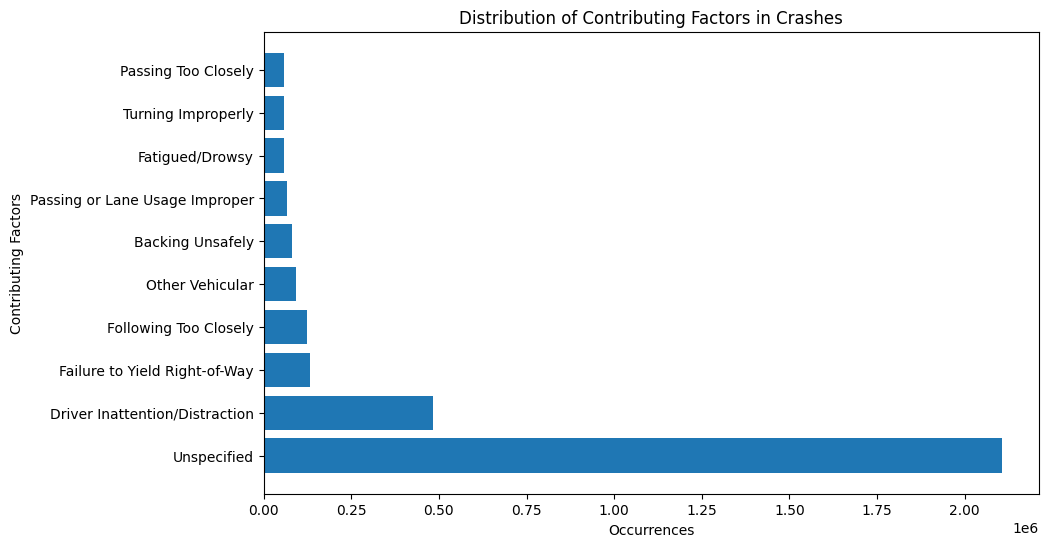

In [ ]:
contributing_factors = [
    'Unspecified',
    'Driver Inattention/Distraction',
    'Failure to Yield Right-of-Way',
    'Following Too Closely',
    'Other Vehicular',
    'Backing Unsafely',
    'Passing or Lane Usage Improper',
    'Fatigued/Drowsy',
    'Turning Improperly',
    'Passing Too Closely'
]

occurrences = [
    2105040,
    483714,
    133770,
    123376,
    92779,
    81855,
    66250,
    58151,
    57752,
    57171
]
# Create a PySpark DataFrame from the data
data = spark.createDataFrame(list(zip(contributing_factors, occurrences)), ["Contributing_Factor", "Occurrences"])

# Sort the data by occurrences in descending order
data = data.orderBy(col("Occurrences").desc())

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
data_pd = data.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(data_pd["Contributing_Factor"], data_pd["Occurrences"])
plt.xlabel('Occurrences')
plt.ylabel('Contributing Factors')
plt.title('Distribution of Contributing Factors in Crashes')

plt.show()


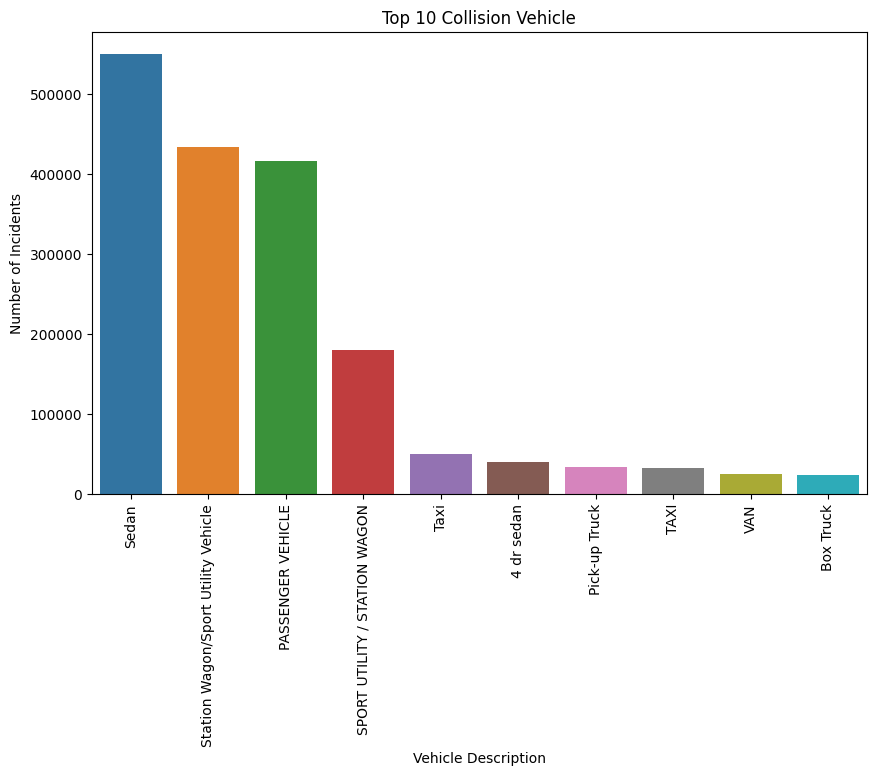

The most common collision vehicle: Sedan


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group the data by 'borough Desc' and count the number of incidents for each location description
vehicle_counts = collision_data.groupBy('VEHICLE TYPE CODE 1').count()

# Convert the result to a Pandas DataFrame for easier plotting
vehicle_counts_df = vehicle_counts.toPandas()

# Sort the DataFrame by count in descending order
vehicle_counts_df = vehicle_counts_df.sort_values(by='count', ascending=False)

# Take the top 10 rows for visualization
top_10_vehicle = vehicle_counts_df.head(10)

# Create a bar plot to visualize the number of incidents for the top 10 location descriptions
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_vehicle['VEHICLE TYPE CODE 1'], y=top_10_vehicle['count'])
plt.xticks(rotation=90)
plt.xlabel('Vehicle Description')
plt.ylabel('Number of Incidents')
plt.title('Top 10 Collision Vehicle')
plt.show()

# Identify the most common location description
most_common_location = top_10_vehicle.iloc[0]['VEHICLE TYPE CODE 1']
print("The most common collision vehicle:", most_common_location)

<ipython-input-36-9ed8f978437a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(injured_column["NUMBER OF PERSONS INJURED"])


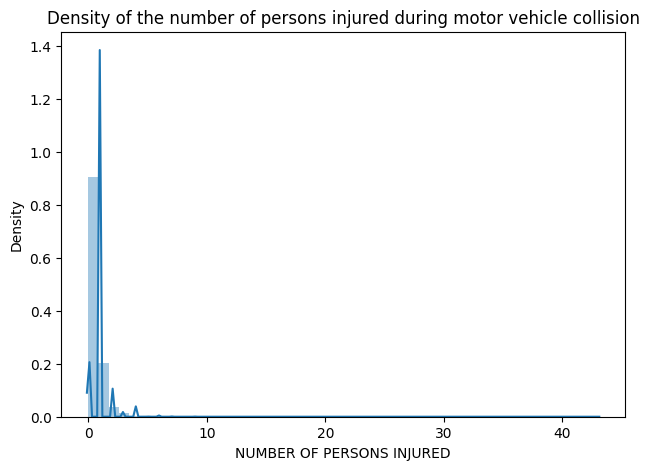

In [ ]:
import seaborn as sns
# Assuming "NUMBER OF PERSONS INJURED" is a numerical column, convert it to Pandas for visualization
injured_column = collision_data.select("NUMBER OF PERSONS INJURED").toPandas()

# Plot the density plot using Seaborn
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(injured_column["NUMBER OF PERSONS INJURED"])
plt.title("Density of the number of persons injured during motor vehicle collision")

plt.show()


<ipython-input-37-8eda50216fc4>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(motorist_injured_column["NUMBER OF MOTORIST INJURED"].astype(float))


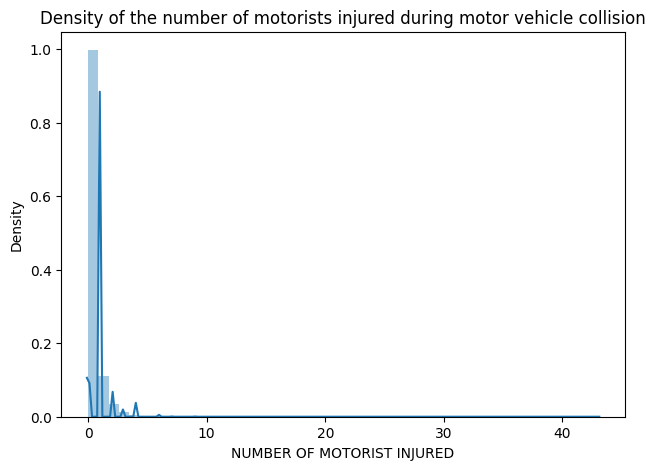

In [ ]:
# Filter out rows with non-numeric values in the "NUMBER OF MOTORIST INJURED" column
df = collision_data.filter(col("NUMBER OF MOTORIST INJURED").cast("double").isNotNull())

# Assuming "NUMBER OF MOTORIST INJURED" is a numerical column, convert it to Pandas for visualization
motorist_injured_column = df.select("NUMBER OF MOTORIST INJURED").toPandas()

# Plot the density plot using Seaborn
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 2)
sns.distplot(motorist_injured_column["NUMBER OF MOTORIST INJURED"].astype(float))
plt.title("Density of the number of motorists injured during motor vehicle collision")

plt.show()


<ipython-input-38-77e972ce5dd3>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cyclist_injured_column["NUMBER OF CYCLIST INJURED"].astype(float))


Text(0.5, 1.0, 'Density of the number of cyclists injured')

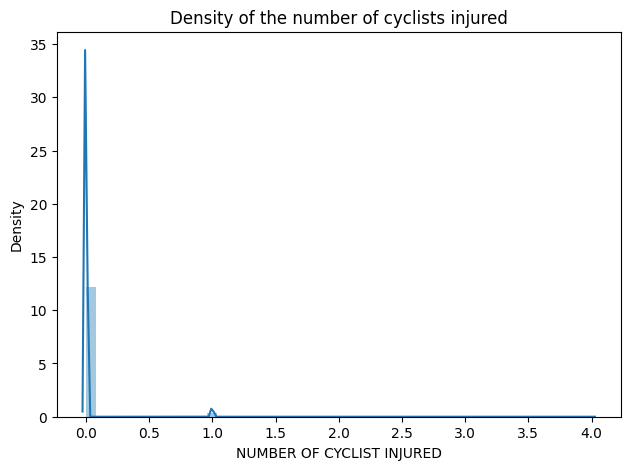

In [ ]:
# Filter out rows with non-numeric values in the columns
df = collision_data.filter(col("NUMBER OF CYCLIST INJURED").cast("double").isNotNull())
df = collision_data.filter(col("NUMBER OF PEDESTRIANS INJURED").cast("double").isNotNull())

# Convert to Pandas for visualization
cyclist_injured_column = collision_data.select("NUMBER OF CYCLIST INJURED").toPandas()
pedestrians_injured_column = collision_data.select("NUMBER OF PEDESTRIANS INJURED").toPandas()

# Create subplots
plt.figure(figsize=(16, 5))

# Subplot 1: Density plot for NUMBER OF CYCLIST INJURED
plt.subplot(1, 2, 1)
sns.distplot(cyclist_injured_column["NUMBER OF CYCLIST INJURED"].astype(float))
plt.title('Density of the number of cyclists injured')


In [ ]:
# Import the Plotly Express library for creating interactive visualizations
import plotly.express as px

# Convert the Spark DataFrame 'collision_data' to a Pandas DataFrame
collision_data_pd = collision_data.toPandas()

# Get the top 5 contributing factors by counting occurrences in the 'CONTRIBUTING FACTOR VEHICLE 1' column
contributing_factor_counts = collision_data_pd['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(5)

# Create a pie chart using Plotly Express
fig = px.pie(
    names=contributing_factor_counts.index,    # Names for the pie chart slices (factor names)
    values=contributing_factor_counts.values,  # Values (counts) corresponding to each factor
    title='Top 5 Contributing Factors in NYC Traffic Collisions',  # Title of the pie chart
)

# Customize the layout of the pie chart
fig.update_layout(
    title_text="Top 5 Contributing Factors in NYC Traffic Collisions",  # Set a centered title
    title_x=0.5,  # Adjust the title's horizontal position
)

# Customize the information displayed when hovering over pie chart slices
fig.update_traces(
    textinfo='percent+label',  # Display percentages and factor labels on hover
    hoverinfo='percent+label',  # Define hover info to show percentages and factor labels
)

# Show the pie chart
fig.show()



/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning:

Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead

<ipython-input-55-372ecb6eef7b>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



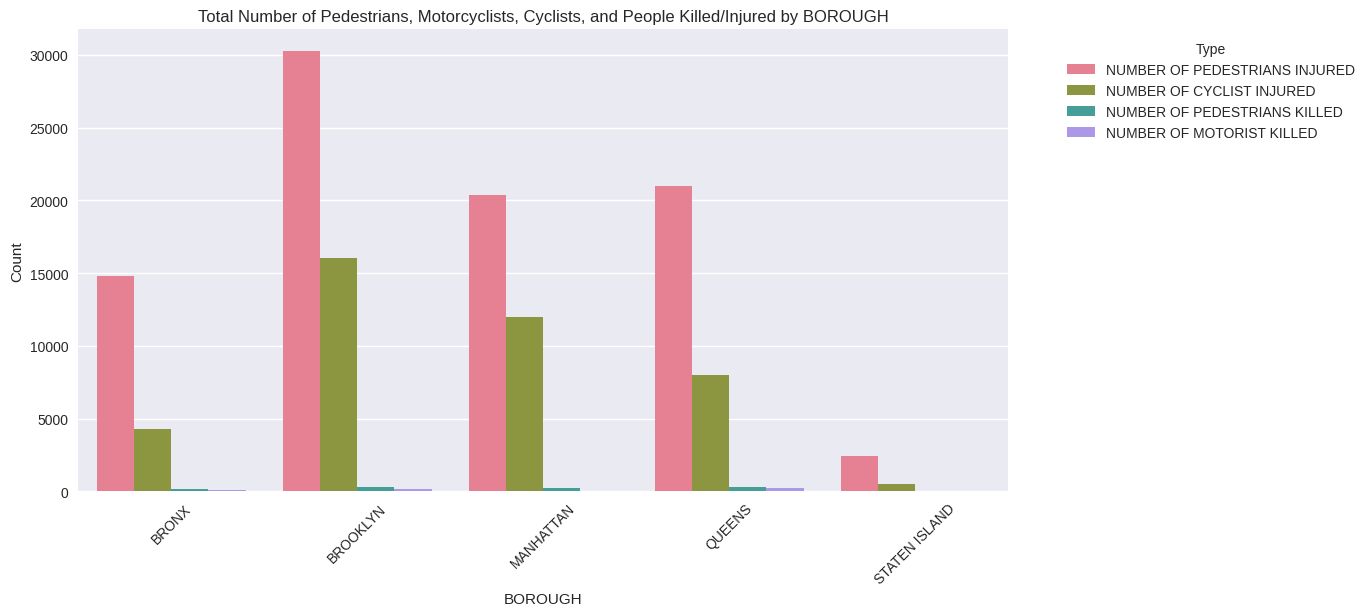

In [ ]:
# Import necessary libraries for data manipulation and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Spark DataFrame 'collision' to a Pandas DataFrame
collision_data_pd = collision.toPandas()

# Group and aggregate the data by BOROUGH and injury type
borough_counts = collision_data_pd.groupby('BOROUGH')[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF MOTORIST INJURED',
                                                      'NUMBER OF CYCLIST INJURED', 'NUMBER OF PEDESTRIANS KILLED',
                                                      'NUMBER OF MOTORIST KILLED', 'NUMBER OF CYCLIST KILLED']].sum().reset_index()

# Melt the DataFrame to reshape it for plotting
borough_counts = borough_counts.melt(id_vars='BOROUGH', var_name='Type', value_name='Count')

# Create the grouped bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='BOROUGH', y='Count', hue='Type', data=borough_counts, palette='husl')
plt.xlabel('BOROUGH')
plt.ylabel('Count')
plt.title('Total Number of Pedestrians, Motorcyclists, Cyclists, and People Killed/Injured by BOROUGH')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add a legend for injury types
plt.show()



In [ ]:
column_indices_to_extract = [1, 2, 3, 4, 6, 7, 10, 11]

# Create a list of column names based on the indices
column_names_to_extract = [collision_data.columns[i] for i in column_indices_to_extract]

# Select the specified columns from the DataFrame
distribution = collision_data.select(*column_names_to_extract)

# Show the extracted DataFrame
distribution.show()


+---------+-------------------------+------------------------+-----------------------------+-------------------------+------------------------+-----------------------------+------------+
|  BOROUGH|NUMBER OF PERSONS INJURED|NUMBER OF PERSONS KILLED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|CONTRIBUTING FACTOR VEHICLE 1|COLLISION_ID|
+---------+-------------------------+------------------------+-----------------------------+-------------------------+------------------------+-----------------------------+------------+
| No Value|                        2|                       0|                            0|                        0|                       0|         Aggressive Drivin...|     4455765|
| No Value|                        1|                       0|                            0|                        0|                       0|            Pavement Slippery|     4513547|
| No Value|                        0|                       0|   

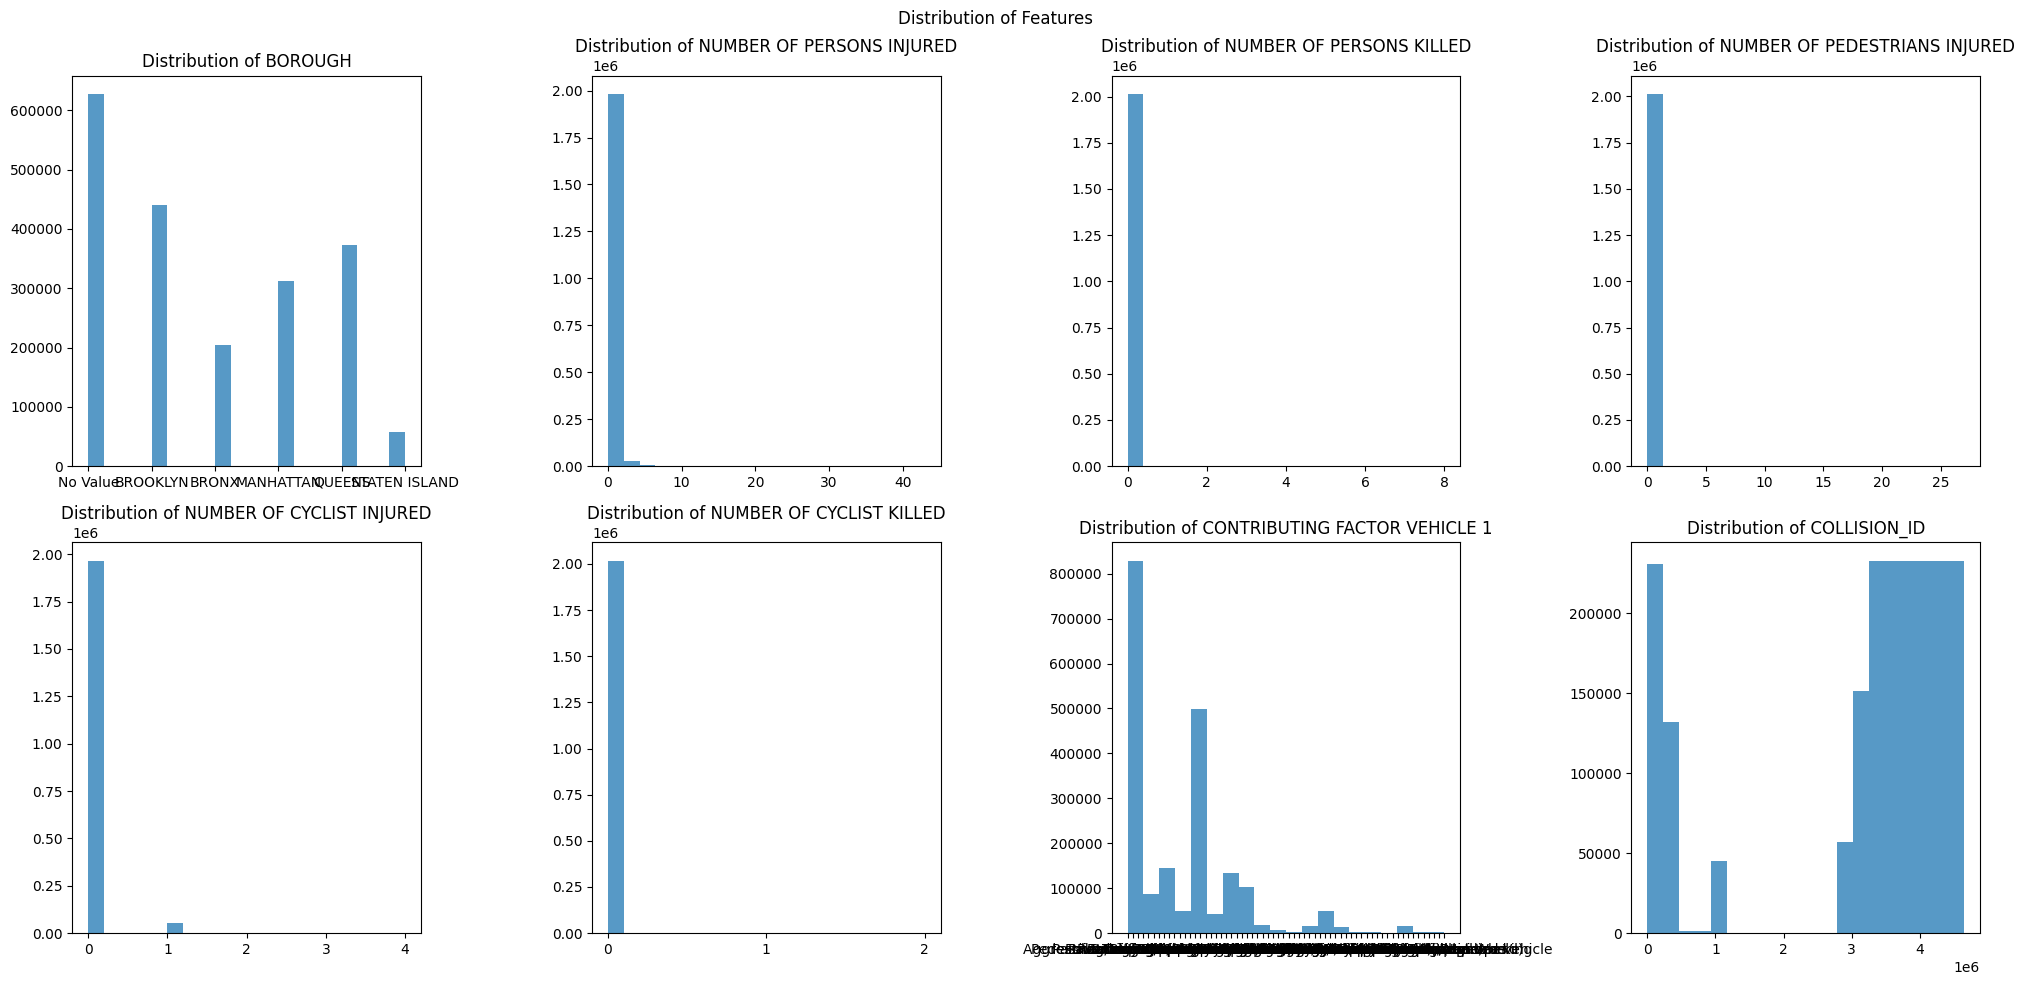

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
# List of feature names you want to plot
features_to_plot = distribution.columns

# Create subplots
nrows = 2
ncols = 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

# Flatten the axs array for easier iteration
axs = axs.ravel()

# Loop through each feature and create a histogram
for i, feature in enumerate(features_to_plot):
    # Compute the histogram using the histogram function
    histogram_data = distribution.select(feature).rdd.flatMap(lambda x: x).collect()

    # Create a histogram plot
    axs[i].hist(histogram_data, bins=20, alpha=0.75)
    axs[i].set_title(f'Distribution of {feature}')

# Set the title for the entire figure
plt.suptitle('Distribution of Features')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning:

Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead



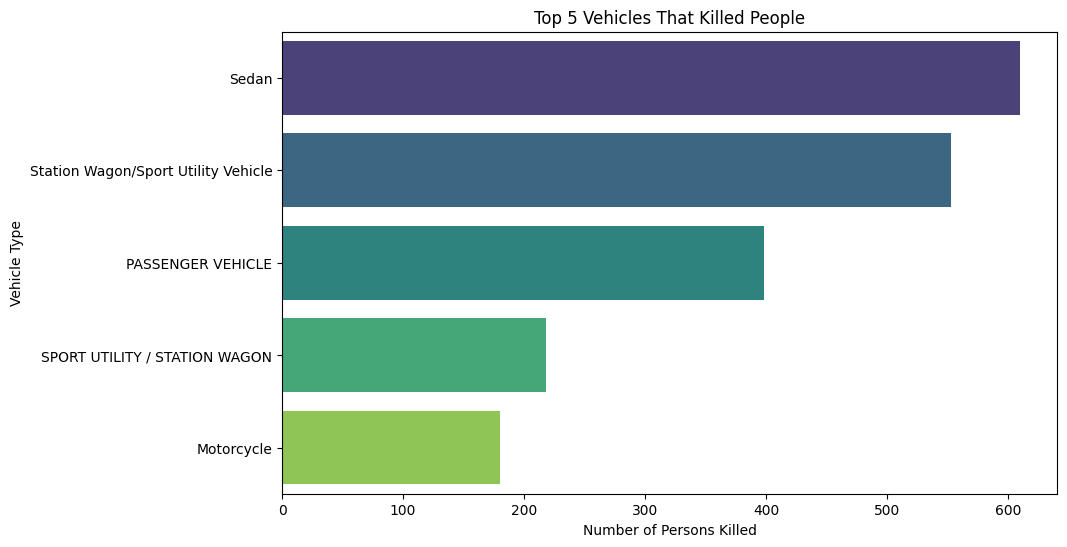

In [ ]:
collision_data_pd = collision_data.toPandas()

# Group and aggregate the data by 'VEHICLE TYPE CODE 1' and the sum of 'NUMBER OF PERSONS KILLED'
top_vehicles_killed = collision_data_pd.groupby('VEHICLE TYPE CODE 1')['NUMBER OF PERSONS KILLED'].sum().nlargest(5).reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='NUMBER OF PERSONS KILLED', y='VEHICLE TYPE CODE 1', data=top_vehicles_killed, palette='viridis')
plt.xlabel('Number of Persons Killed')
plt.ylabel('Vehicle Type')
plt.title('Top 5 Vehicles That Killed People')

plt.show()


/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning:

Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead



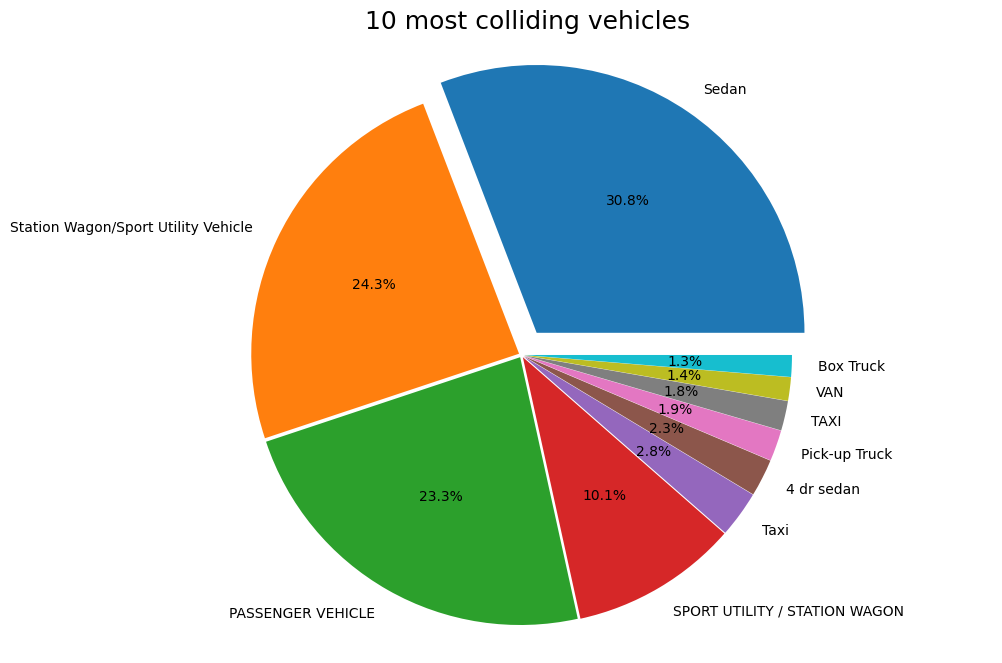

In [ ]:
pd_data = collision_data.toPandas()

# Extract the top 10 most happening crimes
top_10_veh = pd_data["VEHICLE TYPE CODE 1"].value_counts()[:10]

# Define explode values for pie slices (optional)
explode = (0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(top_10_veh, labels=top_10_veh.index, autopct="%1.1f%%", explode=explode)
plt.title("10 most colliding vehicles", fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

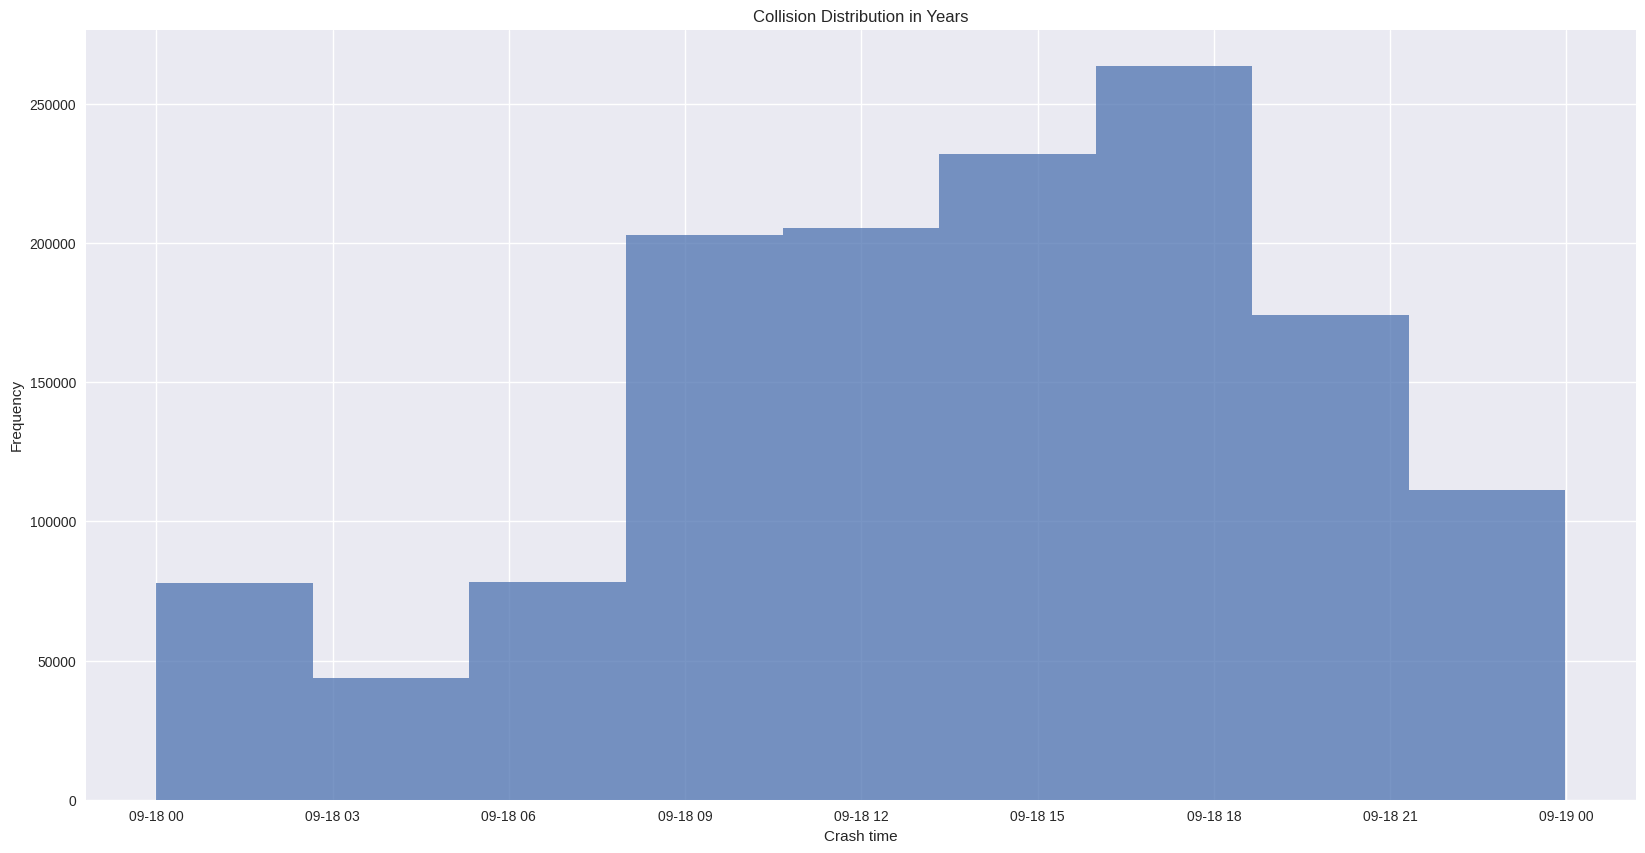

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import pyspark.sql.functions as F


year_occ_data = collision_data.select('CRASH TIME').rdd.flatMap(lambda x: x).collect()

# Create a histogram using matplotlib
plt.figure(figsize=(20, 10))
plt.hist(year_occ_data, bins=9, alpha=0.75)
plt.title('Collision Distribution in Years')
plt.xlabel('Crash time')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning:

Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead

<ipython-input-54-e777b2276415>:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



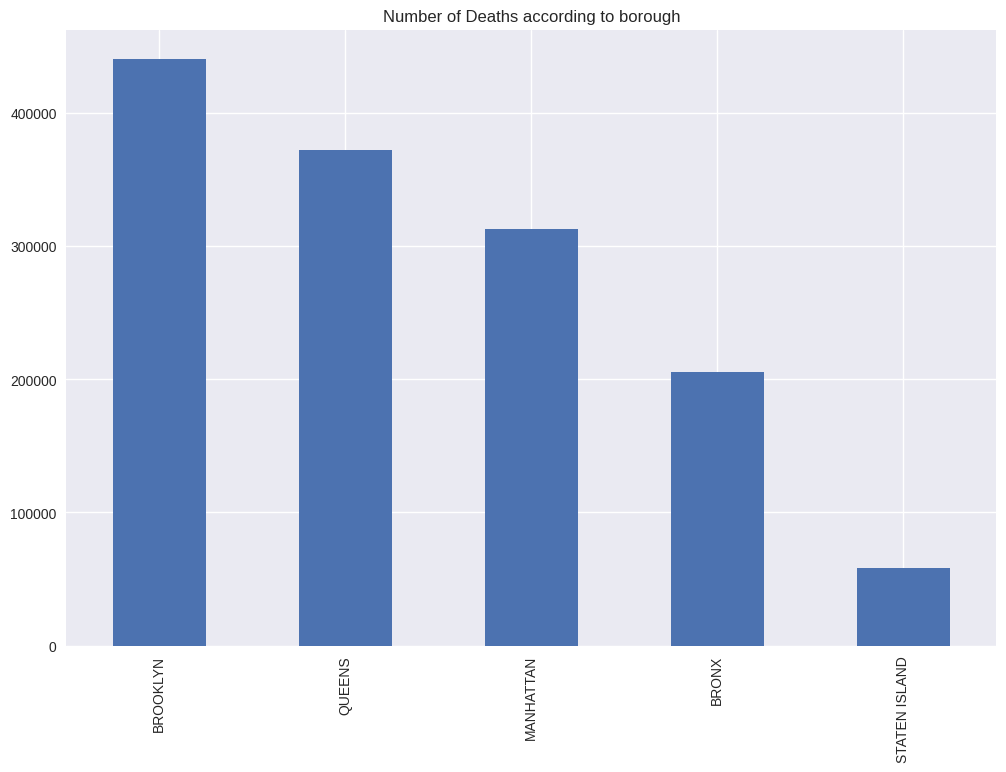

In [ ]:
pd_data = collision.toPandas()

# Set the Seaborn style
plt.style.use("seaborn")

# Create the bar chart using Matplotlib
plt.figure(figsize=(12, 8))
pd_data["BOROUGH"].value_counts().plot(kind='bar')
plt.title('Number of Collisions according to borough')
plt.xticks(rotation=90)
plt.show()

# Label Encoding

In [ ]:
from pyspark.ml.feature import StringIndexer

# Define the columns you want to encode
columns_to_encode = ["BOROUGH", "CONTRIBUTING FACTOR VEHICLE 1", "VEHICLE TYPE CODE 1"]

# Initialize StringIndexer for each column
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in columns_to_encode]

# Fit and transform the data using the StringIndexer
indexer_model = [indexer.fit(collision_data) for indexer in indexers]
indexed_collision_data = collision_data

# Apply the StringIndexer transformations
for i, col in enumerate(columns_to_encode):
    indexed_collision_data = indexer_model[i].transform(indexed_collision_data)

# Show the first 10 rows of the indexed DataFrame
indexed_collision_data.select([col + "_index" for col in columns_to_encode]).show(10)

+-------------+-----------------------------------+-------------------------+
|BOROUGH_index|CONTRIBUTING FACTOR VEHICLE 1_index|VEHICLE TYPE CODE 1_index|
+-------------+-----------------------------------+-------------------------+
|          0.0|                               23.0|                      0.0|
|          0.0|                               17.0|                      0.0|
|          0.0|                                3.0|                      0.0|
|          1.0|                                0.0|                      0.0|
|          1.0|                               27.0|                     17.0|
|          0.0|                                0.0|                     26.0|
|          0.0|                                8.0|                      0.0|
|          4.0|                                0.0|                      0.0|
|          1.0|                               12.0|                      0.0|
|          3.0|                                8.0|             

In [ ]:
from pyspark.sql.functions import col

# Select the desired columns from the original DataFrame
selected_columns = [
    "BOROUGH_index",
    "NUMBER OF PERSONS KILLED",
    "NUMBER OF PERSONS INJURED",
    "NUMBER OF PEDESTRIANS INJURED",
    "NUMBER OF PEDESTRIANS KILLED",
    "NUMBER OF CYCLIST INJURED",
    "NUMBER OF CYCLIST KILLED",
    "NUMBER OF MOTORIST INJURED",
    "NUMBER OF MOTORIST KILLED",
    "CONTRIBUTING FACTOR VEHICLE 1_index",
    "VEHICLE TYPE CODE 1_index",
    "COLLISION_ID"
]

# Create the new DataFrame
new_collision_data = indexed_collision_data.select(*selected_columns)

# Show the new DataFrame
new_collision_data.show()


+-------------+------------------------+-------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------------+-------------------------+------------+
|BOROUGH_index|NUMBER OF PERSONS KILLED|NUMBER OF PERSONS INJURED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOTORIST KILLED|CONTRIBUTING FACTOR VEHICLE 1_index|VEHICLE TYPE CODE 1_index|COLLISION_ID|
+-------------+------------------------+-------------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------------+-------------------------+------------+
|          0.0|                       0|                        2|                   

<ipython-input-58-d1eabdd0a8de>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



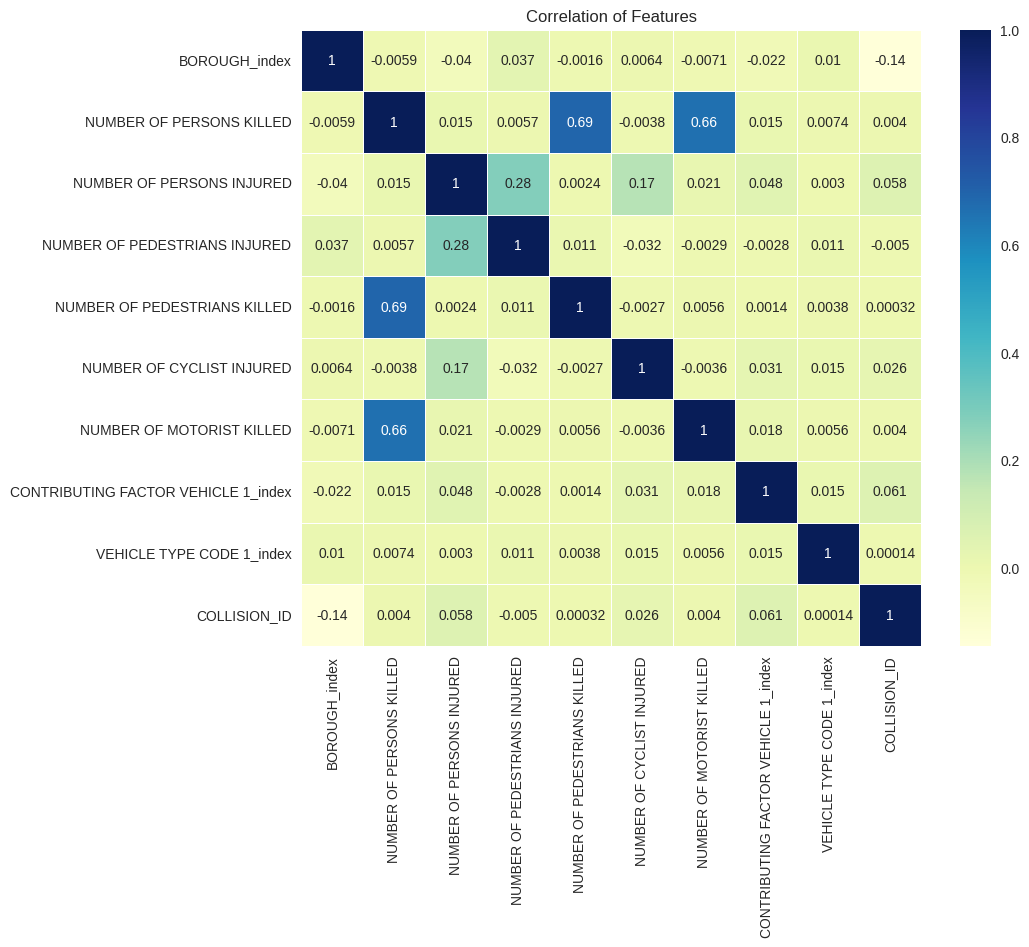

In [ ]:
pandas_df = new_collision_data.toPandas()

# Create a correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
plt.title('Correlation of Features')
sns.heatmap(pandas_df.corr(), annot=True, linewidths=0.5, cmap="YlGnBu")

# Show the heatmap
plt.show()


# Model Building

In [ ]:
from pyspark.sql.functions import lit
# Select the features from the PySpark DataFrame
features = new_collision_data.select(
    'BOROUGH_index', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1_index',
    'VEHICLE TYPE CODE 1_index', 'COLLISION_ID'
)

# Create a new DataFrame for the target variable with a constant value
target_value = new_collision_data['NUMBER OF PERSONS KILLED'].iloc[0]  # Use any row's value as the constant

In [ ]:
# Import necessary libraries from PySpark for feature engineering, evaluation, and regression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.regression import LinearRegression

# Define the columns that will be used as features for regression
feature_columns = ['BOROUGH_index', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED',
                    'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
                    'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1_index',
                    'VEHICLE TYPE CODE 1_index', 'COLLISION_ID']

# Create a VectorAssembler to combine the feature columns into a single "features" column
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Split the data into training and testing sets (80% train, 20% test) using the 'new_collision_data' DataFrame
train_data, test_data = new_collision_data.randomSplit([0.8, 0.2], seed=42)

# Check the number of rows in each set
print("Training set count:", train_data.count())
print("Testing set count:", test_data.count())




Training set count: 1613167
Testing set count: 403097


In [ ]:
from pyspark.ml.feature import VectorAssembler

# List of feature column names
feature_columns = ['BOROUGH_index', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',  'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1_index', 'VEHICLE TYPE CODE 1_index', 'COLLISION_ID']

# Initialize the VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Transform the training data using the VectorAssembler
train_data = assembler.transform(train_data)

# Create and fit the Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='NUMBER OF PERSONS KILLED')
lr_model = lr.fit(train_data)

# Make predictions on the test data
test_data = assembler.transform(test_data)
predictions = lr_model.transform(test_data)


**Linear Regression model**

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
# Create a RegressionEvaluator
evaluator = RegressionEvaluator(labelCol='NUMBER OF PERSONS KILLED', predictionCol='prediction', metricName='r2')

# Calculate the R-squared (R^2) score
r_squared = evaluator.evaluate(predictions)

# Print the R-squared score
print('R-squared (R^2) score of Linear Regression model on the test set: {:.2f}'.format(r_squared))

R-squared (R^2) score of Linear Regression model on the test set: 0.91


**Random Forest Regressor model**

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
rf = RandomForestRegressor(featuresCol='features', labelCol='NUMBER OF PERSONS KILLED', maxBins=4000)

# Fit the model to the training data
rf_model = rf.fit(train_data)

# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Create a RegressionEvaluator
evaluator = RegressionEvaluator(labelCol='NUMBER OF PERSONS KILLED', predictionCol='prediction', metricName='r2')

# Calculate the R-squared (R^2) score
r_squared = evaluator.evaluate(predictions)

# Print the R-squared score
print('R-squared (R^2) score of Random Forest Regressor model on the test set: {:.2f}'.format(r_squared))


R-squared (R^2) score of Random Forest Regressor model on the test set: 0.82
